In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [27]:
iris = load_iris()
X = iris.data
y = iris.target

In [28]:
data = pd.DataFrame(X,columns=iris.feature_names)

In [36]:
data["Species"] = y
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: ylabel='count'>

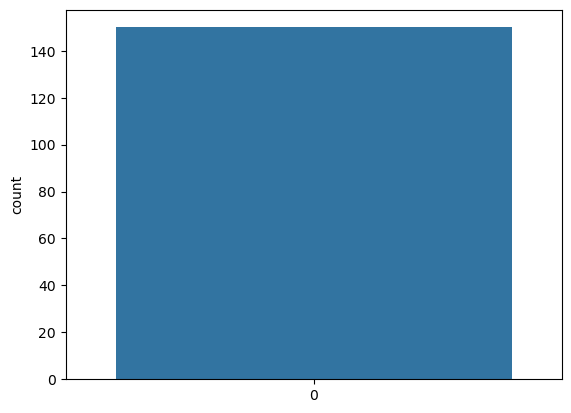

In [35]:
sns.countplot(data["Species"])

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


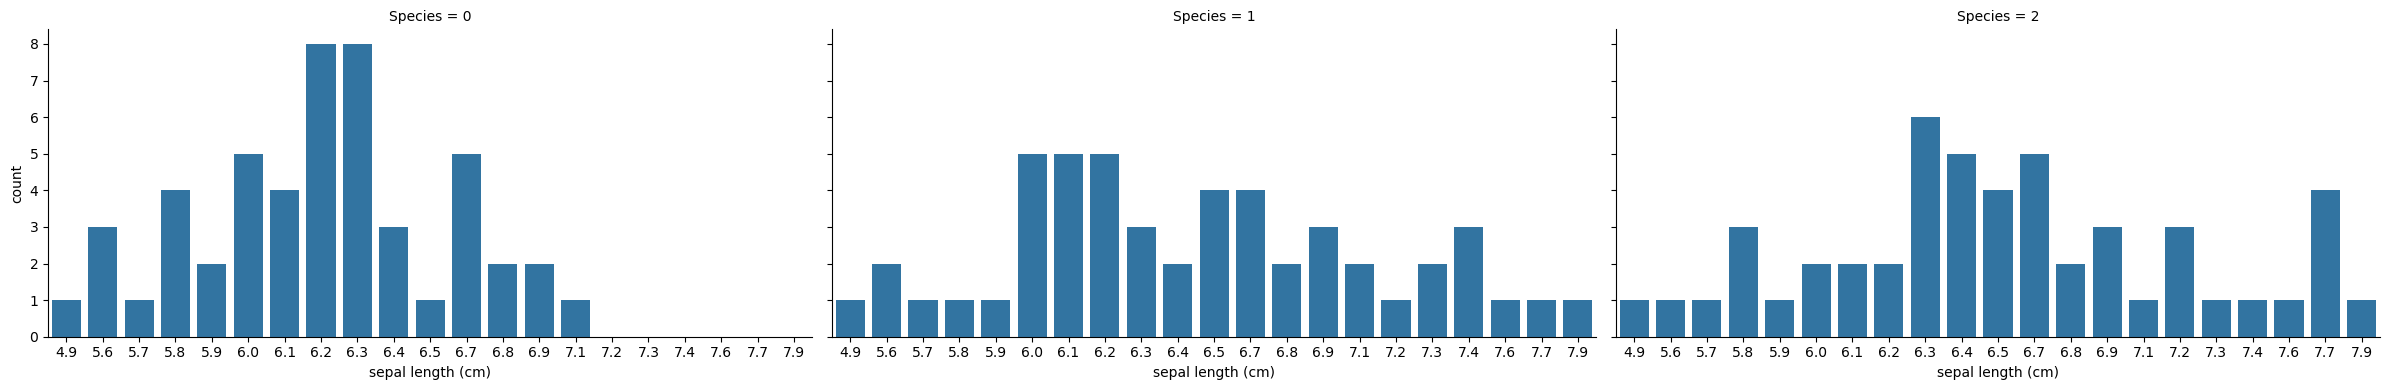

In [40]:
grid = sns.FacetGrid(data, col="Species", height=4, aspect=2)
grid.map(sns.countplot, "sepal length (cm)" )

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


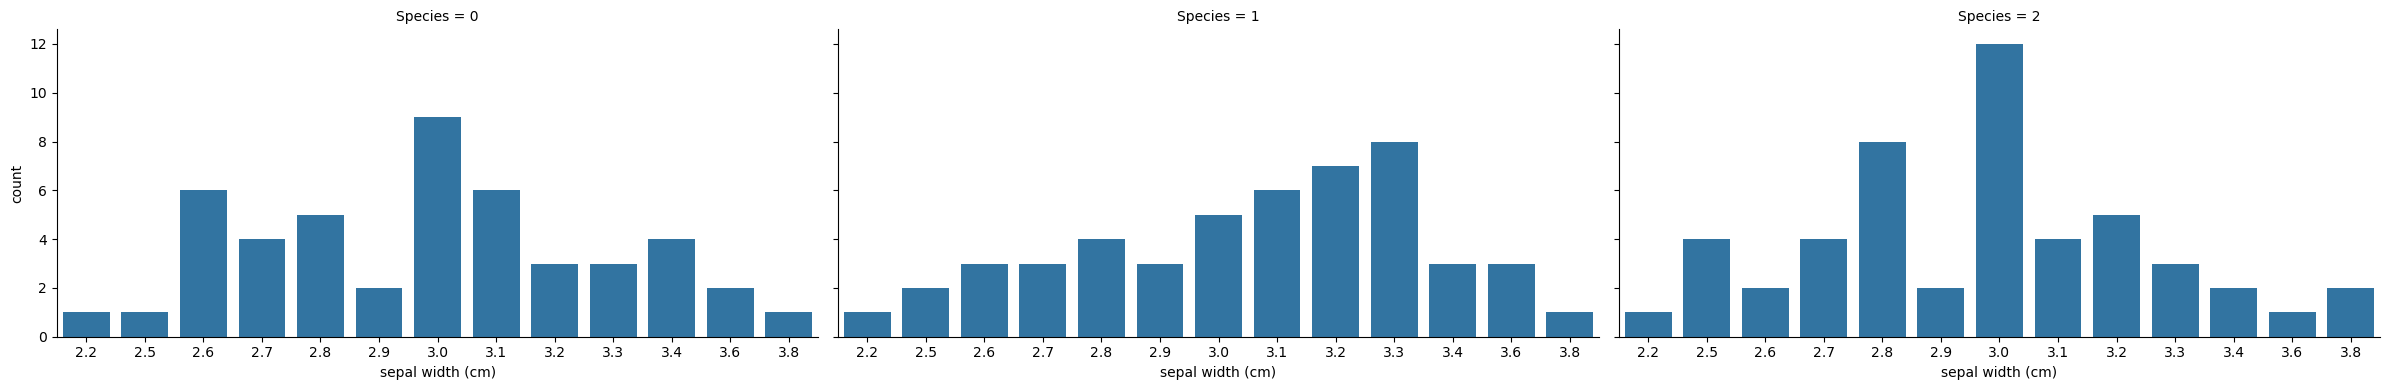

In [41]:
grid = sns.FacetGrid(data, col="Species", height=4, aspect=2)
grid.map(sns.countplot, "sepal width (cm)" )

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


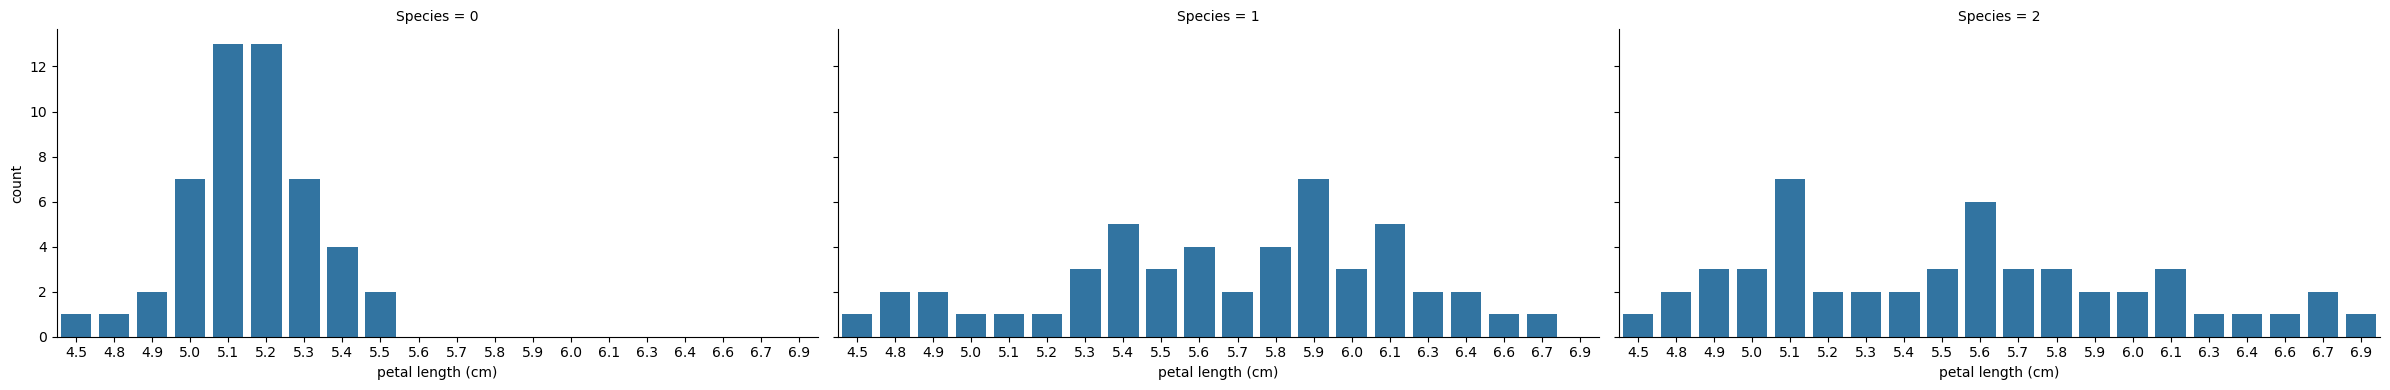

In [42]:
grid = sns.FacetGrid(data, col="Species", height=4, aspect=2)
grid.map(sns.countplot, "petal length (cm)" )

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


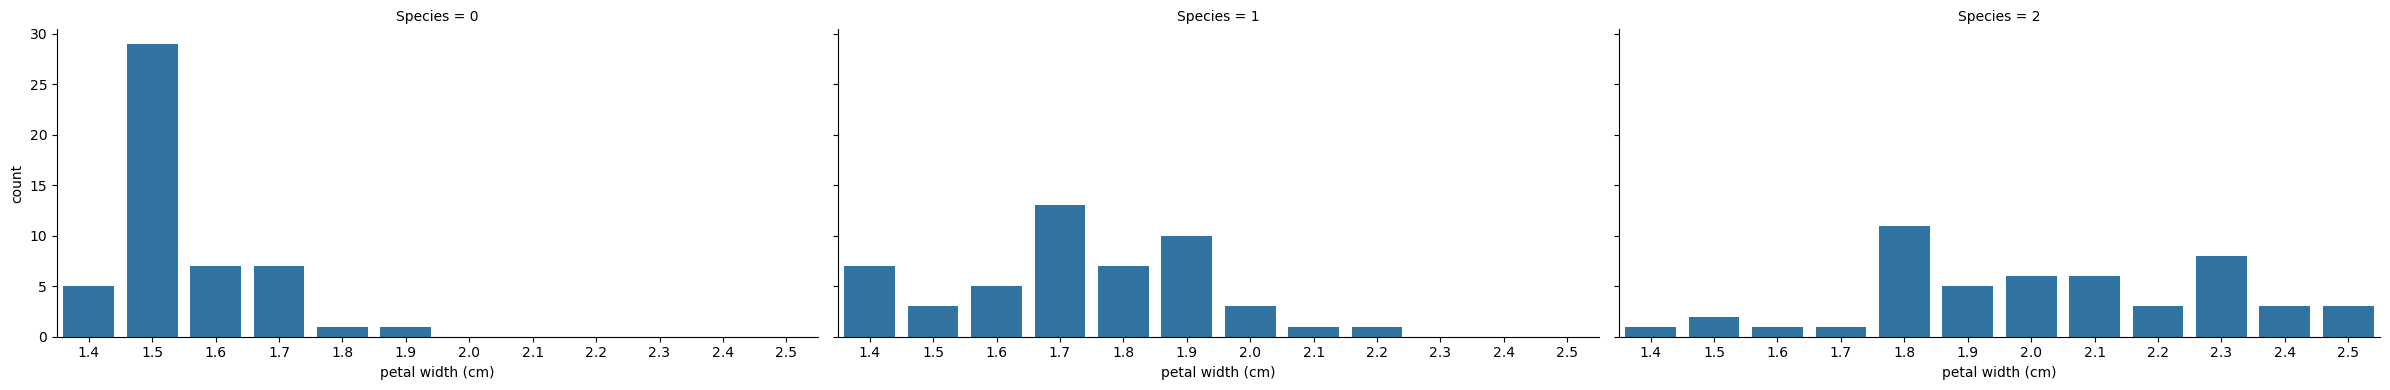

In [43]:
grid = sns.FacetGrid(data, col="Species", height=4, aspect=2)
grid.map(sns.countplot, "petal width (cm)" )

In [45]:
data.notnull().sum()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
Species              150
dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [47]:
len(X_train), len(X_test), len(y_train), len(y_test)

(105, 45, 105, 45)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier 

In [54]:
models = { 
    'Logistic_Regression' : LogisticRegression(random_state=42),
    'SVC' : SVC(kernel='rbf', gamma=0.5, probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42) ,
    'GradientBoostingClassifier' : GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42)
} 

In [55]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

def loss(y_true, y_pred, retur=False): 
    pre = precision_score(y_true, y_pred, average='macro')  
    rec = recall_score(y_true, y_pred, average='macro') 
    accuracy = accuracy_score(y_true, y_pred)
    
    if retur:
        return pre, rec, accuracy 
    else: 
        print(pre) 
        print(rec) 
        print(accuracy)

In [56]:
def train_and_eval(models, X,y): 
    for name, model in models.items(): 
        print(name ,':')  
        model.fit(X,y)
        loss(y, model.predict(X)) 
        print('*' * 30) 

In [57]:
train_and_eval(models, X_train, y_train)

Logistic_Regression :
0.964835164835165
0.963963963963964
0.9619047619047619
******************************
SVC :
0.9912280701754387
0.990990990990991
0.9904761904761905
******************************
DecisionTreeClassifier :
0.5
0.6666666666666666
0.6476190476190476
******************************
GradientBoostingClassifier :
0.964835164835165
0.963963963963964
0.9619047619047619
******************************


E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
gra =  GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42)
gra.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=3,
                           random_state=42)

In [60]:
import joblib 

joblib.dump(gra, 'model.pkl') 

grad = joblib.load('model.pkl')